In [21]:
import random
from typing import List


class Item:
    def __init__(self, name, weight, value):
        self.name = name
        self.weight = weight
        self.value = value


class Individual:
    def __init__(self, bits: List[int]):
        self.bits = bits
    
    def __str__(self):
        return repr(self.bits)

    def __hash__(self):
        return hash(str(self.bits))
    
    def fitness(self) -> float:
        total_value = sum([
            bit * item.value
            for item, bit in zip(items, self.bits)
        ])

        total_weight = sum([
            bit * item.weight
            for item, bit in zip(items, self.bits)
        ])

        if total_weight <= MAX_KNAPSACK_WEIGHT:
            return total_value
        
        return 0

In [22]:
MAX_KNAPSACK_WEIGHT = 15
CROSSOVER_RATE = 0.09
MUTATION_RATE = 0.0001
REPRODUCTION_RATE = 0.2

items = [
    Item("A", 7, 5),
    Item("B", 2, 4),
    Item("C", 1, 7),
    Item("D", 9, 2),
    Item("E", 3, 6)
]


def generate_initial_population(count=6) -> List[Individual]:
    population = set()

    # generate initial population having `count` individuals
    while len(population) != count:
        # pick random bits one for each item and 
        # create an individual 
        bits = [
            random.choice([0, 1])
            for _ in items
        ]
        population.add(Individual(bits))

    return list(population)


def selection(population: List[Individual]) -> List[Individual]:
    parents = []
    
    # randomly shuffle the population
    random.shuffle(population)

    # we use the first 4 individuals
    # run a tournament between them and
    # get two fit parents for the next steps of evolution

    # tournament between first and second
    if population[0].fitness() > population[1].fitness():
        parents.append(population[0])
    else:
        parents.append(population[1])
    
    # tournament between third and fourth
    if population[2].fitness() > population[3].fitness():
        parents.append(population[2])
    else:
        parents.append(population[3])

    return parents


def crossover(parents: List[Individual]) -> List[Individual]:
    N = len(items)

    child1 = parents[0].bits[:N//2] + parents[1].bits[N//2:]
    child2 = parents[0].bits[N//2:] + parents[1].bits[:N//2]

    return [Individual(child1), Individual(child2)]


def mutate(individuals: List[Individual]) -> List[Individual]:
    for individual in individuals:
        for i in range(len(individual.bits)):
            if random.random() < MUTATION_RATE:
                # Flip the bit
                individual.bits[i] = ~individual.bits[i]


def next_generation(population: List[Individual]) -> List[Individual]:
    next_gen = []
    while len(next_gen) < len(population):
        children = []

        # we run selection and get parents
        parents = selection(population)

        # reproduction
        if random.random() < REPRODUCTION_RATE:
            children = parents
        else:
            # crossover
            if random.random() < CROSSOVER_RATE:
                children = crossover(parents)
            
            # mutation
            if random.random() < MUTATION_RATE:
                mutate(children)

        next_gen.extend(children)

    return next_gen[:len(population)]


def print_generation(population: List[Individual],i):
    print(f"--------------Iteration_{i}------------------")
    for individual in population:
        print(individual.bits, individual.fitness())
    print()
    print("Average fitness", sum([x.fitness() for x in population])/len(population))


def average_fitness(population: List[Individual]) -> float:
    return sum([i.fitness() for i in population]) / len(population)


def solve_knapsack() -> Individual:
    population = generate_initial_population()
    
    avg_fitnesses = []
    Best_Solutions = []
    i = 0

    for _ in range(500):
        avg_fitnesses.append(average_fitness(population))
        population = next_generation(population)
        # Useful information
        population = sorted(population, key=lambda i: i.fitness(), reverse=True)
        print_generation(population,i)
        Best_Solutions.append(population[0])
        i = i + 1 

    population = sorted(population, key=lambda i: i.fitness(), reverse=True)
    return population[0],avg_fitnesses,Best_Solutions

In [23]:
solution,avg_fitnesses,Best_Solutions = solve_knapsack()
print(solution, solution.fitness())

--------------Iteration_0------------------
[1, 1, 1, 0, 0] 16
[1, 1, 1, 0, 0] 16
[1, 1, 1, 0, 0] 16
[1, 1, 0, 0, 0] 9
[0, 0, 0, 1, 1] 8
[0, 0, 0, 0, 1] 6

Average fitness 11.833333333333334
--------------Iteration_1------------------
[1, 1, 1, 0, 0] 16
[1, 1, 1, 0, 0] 16
[1, 1, 1, 0, 0] 16
[1, 1, 1, 0, 0] 16
[1, 1, 0, 0, 0] 9
[1, 0, 0, 1, 1] 0

Average fitness 12.166666666666666
--------------Iteration_2------------------
[1, 1, 1, 0, 0] 16
[1, 1, 1, 0, 0] 16
[1, 1, 1, 0, 0] 16
[1, 1, 1, 0, 0] 16
[1, 1, 1, 0, 0] 16
[1, 0, 0, 1, 1] 0

Average fitness 13.333333333333334
--------------Iteration_3------------------
[1, 1, 1, 0, 0] 16
[1, 1, 1, 0, 0] 16
[1, 1, 1, 0, 0] 16
[1, 1, 1, 0, 0] 16
[1, 1, 1, 0, 0] 16
[1, 0, 0, 1, 1] 0

Average fitness 13.333333333333334
--------------Iteration_4------------------
[1, 1, 1, 0, 0] 16
[1, 1, 1, 0, 0] 16
[1, 1, 1, 0, 0] 16
[1, 1, 1, 0, 0] 16
[1, 1, 1, 0, 0] 16
[1, 0, 0, 1, 1] 0

Average fitness 13.333333333333334
--------------Iteration_5-------------

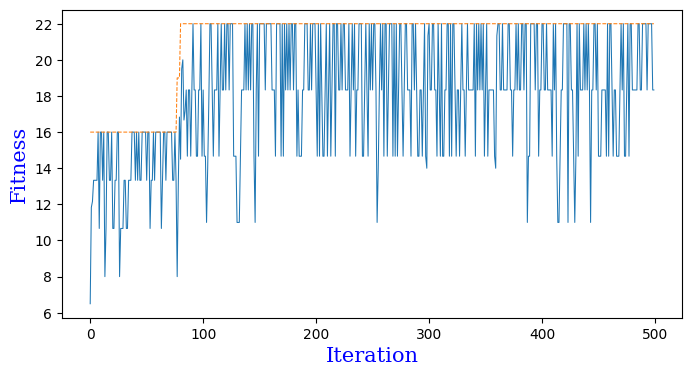

In [24]:
import matplotlib.pyplot as plt
import numpy as np

fitness = []
x=[fitness.append(item.fitness()) for item in Best_Solutions]
x1 = np.array(list(range(0,500)))
y1 = np.array(avg_fitnesses)
y2 = np.array(fitness)
plt.figure(figsize=(8, 4))
plt.plot(x1, y1, linewidth = '0.75')
plt.plot(x1, y2, linewidth = '0.75', ls = '--')
font1 = {'family':'serif','color':'blue','size':15}
plt.xlabel("Iteration", fontdict = font1)
plt.ylabel("Fitness", fontdict = font1)
plt.show()